## Simulación de procesos AR y MA

## Cargar paquetes

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (10,8)

## Simulación de Proceso AR(2)

https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.ArmaProcess.html

$ y_t = \phi_1 y_{t-1} + ... + \phi_p y_{t-p} + \theta_0 \epsilon_t + \theta_1 \epsilon_{t-1} + ... + \theta_q \epsilon_{t-q}  $ <br>
Y la representación con el operador de retardo $B$ es: <br>
$ (1 -  \phi_1 B - ... - \phi_p B^p) y_t  =(\theta_0  + \theta_1 B + ... + \theta_q B^q) \epsilon_t$ 

Nuestro modelo será: <br>
$ y_t = 0.33y_{t-1} + 0.5y_{t-2} + 0.1\epsilon(t) $

In [4]:
ar2 = np.array([1, 0.33, 0.5]) # Suma retardo cero
ma2 = np.array([0.1, 0, 0])

In [5]:
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

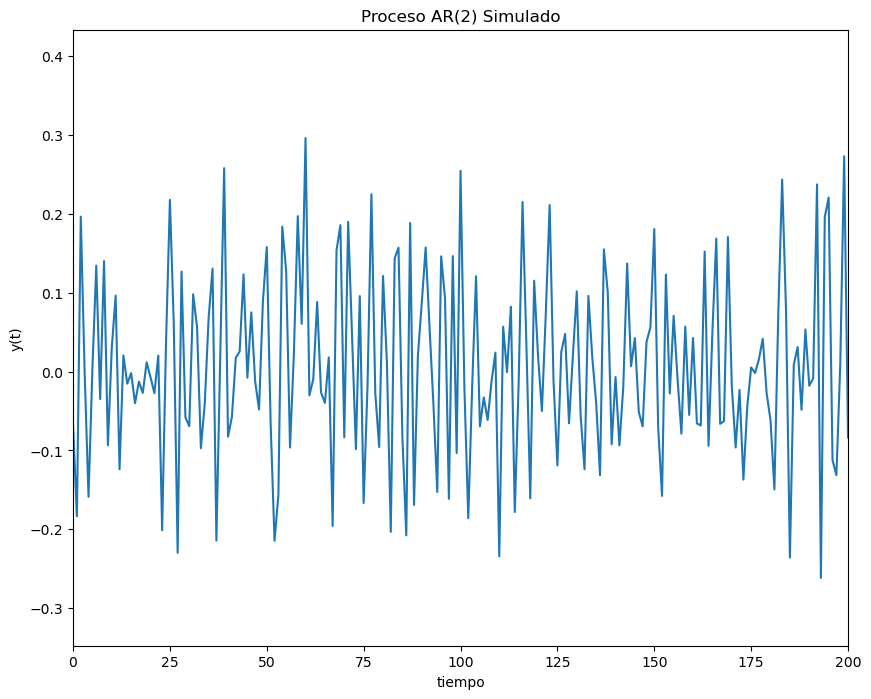

In [6]:
plt.plot(AR2_process)
plt.title('Proceso AR(2) Simulado')
plt.xlabel('tiempo')
plt.ylabel('y(t)')
plt.xlim(0,200)
plt.show()

### La función de autocorrelación

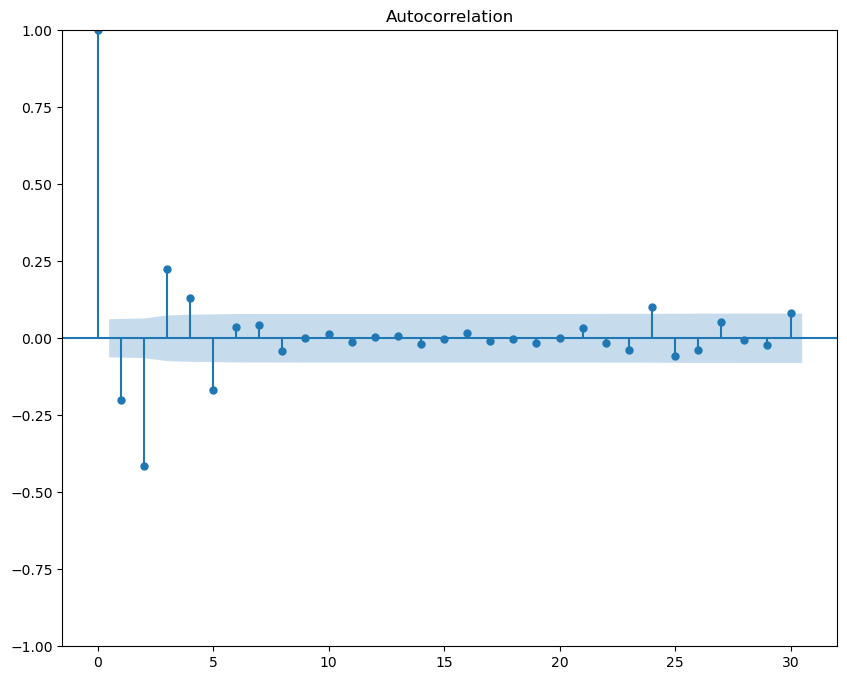

In [7]:
plot_acf(AR2_process);

### La función de autocorrelación parcial

In [8]:
plot_pacf(AR2_process);

## El cálculo de los coeficientes del modelo

In [9]:
rho, sigma = yule_walker(AR2_process, 2, method='mle')
rho, sigma

(array([-0.29555457, -0.4742846 ]), 0.10082088193293051)

### Simular un proceso AR(3)

$ y_t = 0.33 y_{t-1} + 0.5 y_{t-2} + 0.07 y_{t-3} + 0.2 \epsilon_t $

In [10]:
ar3 = np.array([1, 0.33, 0.5, 0.07]) # Suma retardo cero
ma3 = np.array([0.2, 0, 0, 0])

In [11]:
AR3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=1000)

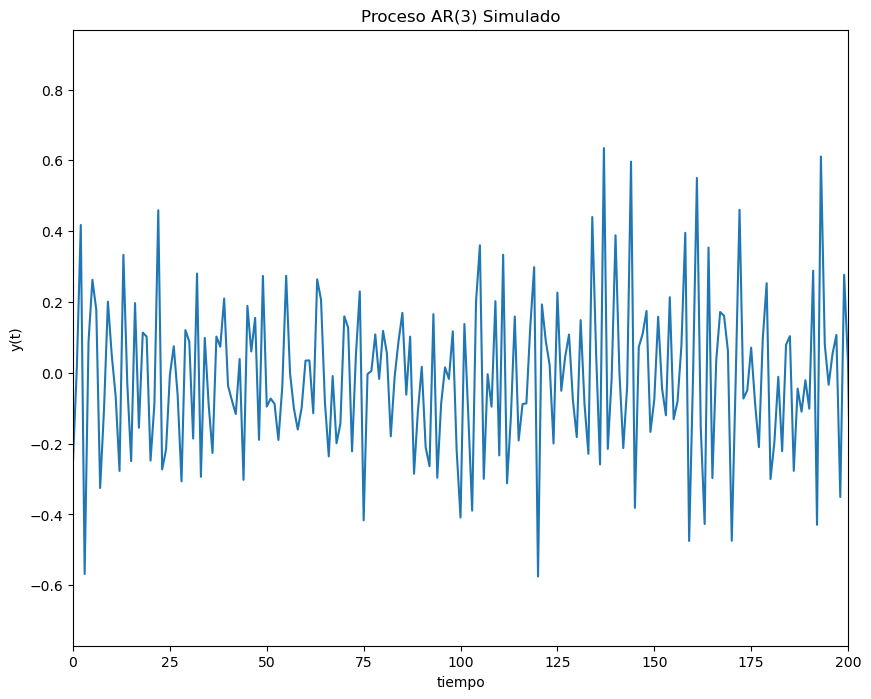

In [12]:
plt.plot(AR3_process)
plt.title('Proceso AR(3) Simulado')
plt.xlabel('tiempo')
plt.ylabel('y(t)')
plt.xlim(0,200)
plt.show()

In [15]:
plot_acf(AR3_process);

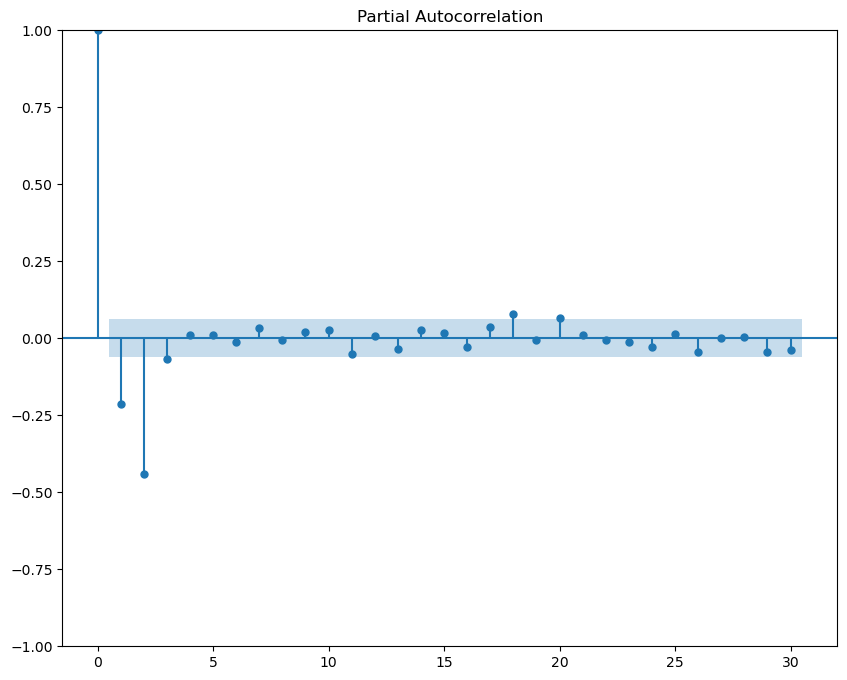

In [16]:
plot_pacf(AR3_process);

In [ ]:
rho, sigma = yule_walker(AR3_process, 3, method='mle')
rho, sigma

## Ejercicio en clase

In [ ]:
url = "https://raw.githubusercontent.com/Chefi/Modelos-de-Control-de-Producci-n/refs/heads/main/jj.csv"

In [ ]:
data = pd.read_csv(url, index_col="date", parse_dates=True)

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.describe()

In [ ]:
data.index.freq

In [ ]:
pd.date_range(start="1960-01-01", end="1980-10-01", freq="QS")

In [ ]:
data.index = pd.date_range(start="1960-01-01", end="1980-10-01", freq="QS")

In [ ]:
data.index

In [ ]:
data['data'].iloc[:].plot(figsize=(12,8))
plt.legend(loc='upper left')
plt.xlabel('tiempo')
plt.ylabel('y(t)')
#plt.xlim(0,200)
plt.show()

In [ ]:
plt.figure(figsize=[15,8])
plt.scatter(data.index.values, data['data'])
plt.title('Datos de ventas trimestrales de Jhonson & Jhonson entre 1960 y 1980')
plt.xlabel('Trimestres')
plt.ylabel('Ventas')
plt.show()

## Volver estacionaria la serie

In [ ]:
data['logdata'] = np.log(data['data'])
data['difflogdata'] = data['logdata'].diff()
data.head()

In [ ]:
data = data.dropna()
data.head()

In [ ]:
data['difflogdata'].iloc[:].plot(figsize=(12,8))
plt.legend(loc='upper left')
plt.xlabel('tiempo')
plt.ylabel('y(t)')
#plt.xlim(0,200)
plt.show()

## Prueba de estacionalidad

In [ ]:
adfuller(data['difflogdata']) # Ho es que la serie no es estacionaria

### Rechaza en este caso la Ho de que no es estacionaria

In [ ]:
plot_acf(data['difflogdata']);
plot_pacf(data['difflogdata']);

### Tratamos un AR(4)

In [ ]:
rho, sigma = yule_walker(data['difflogdata'], 4)
rho, sigma

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['difflogdata'], order=(4, 0, 0))
model_fit = model.fit()

In [ ]:
forecast = model_fit.get_forecast(steps=len(data))

In [ ]:
forecast.predicted_mean

In [ ]:
model_fit.resid

In [ ]:
data["Ajustados"] = -model_fit.resid+data['difflogdata']
data.head()

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
plot_acf(residuals);
plot_pacf(residuals);

In [ ]:
model_fit.summary()

In [ ]:
data.index

In [ ]:
model.predict

In [ ]:
# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(data['difflogdata'], label='Data')
plt.plot(data['Ajustados'], label='Ajustada Data', color='orange')
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('y(t)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['difflogdata'], order=(4, 0, 0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['difflogdata'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['difflogdata'], label='Training Data')
plt.plot(test['difflogdata'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('y(t)')
plt.legend()
plt.show()

print('RMSE:', rmse)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['logdata'], order=(4, 1, 0))
model_fit = model.fit()

In [ ]:
forecast = model_fit.get_forecast(steps=30)

In [ ]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['logdata'], order=(4, 1, 0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['logdata'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['logdata'], label='Training Data')
plt.plot(test['logdata'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('y(t)')
plt.legend()
plt.show()

print('RMSE:', rmse)

In [ ]:
data

In [ ]:
test_forecast.summary_frame()

In [ ]:
model_train_fit.params

In [ ]:
model_train_fit.summary()

In [ ]:
residuals = pd.DataFrame(model_train_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
plot_acf(residuals);
plot_pacf(residuals);

In [ ]:
test_forecast_series-test['logdata']